### Crawling Berita

## **Import Library**

In [ ]:
!pip install Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Proses Crawling Berita**

In [ ]:
#melakukan web scraping pada halaman berita yang berasal dari URL
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3799398/mukti-ali-dituntut-6-tahun-penjara"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")



				Jakarta (ANTARA) - Jaksa penuntut umum (JPU) pada Kejaksaan Agung (Kejagung) RI menuntut Account Director of Integrated Account Departement PT Huawei Tech Investment Mukti Ali selama 6 tahun dan membayar denda Rp500 juta subsider 6 bulan pidana kurungan dalam perkara korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).
"Menjatuhkan pidana terhadap terdakwa Mukti Ali selama 6 tahun dikurangi sepenuhnya dengan lamanya terdakwa ditahan dengan perintah agar terdakwa tetap dilakukan penahanan di rutan," kata jaksa dalam persidangan di Pengadilan Tindak Pidana Korupsi (Tipikor) pada Pengadilan Negeri Jakarta Pusat, Senin.
Jaksa menyatakan bahwa terdakwa Mukti Ali terbukti secara sah dan meyakinkan bersalah menurut hukum turut serta dalam melakukan tindak pidana korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).
Mukti didakwa telah melanggar Pasal 2 ayat (1) juncto Pasal 18 Undang-Undang Nomor 31 Tahun 1999 tentang Pemberantasan Tindak Pidana Korupsi s

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Preprocessing**

In [ ]:
# Lowercasing
article_text = article_text.lower()

# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#custome stopword

from nltk.corpus import stopwords

# Mengambil daftar stopword bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words("indonesian"))

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'akulah', 'kata', 'tentunya', 'hendaknya', 'ditunjuk', 'kemudian', 'saling', 'katakanlah', 'jelas', 'enggaknya', 'apaan', 'sejak', 'tegas', 'setiba', 'berapalah', 'didatangkan', 'sendirinya', 'kenapa', 'amatlah', 'terbanyak', 'ibaratkan', 'sesampai', 'sepantasnyalah', 'mulanya', 'seolah', 'apakah', 'buat', 'berkenaan', 'masing', 'begini', 'menjelaskan', 'segala', 'ungkap', 'malahan', 'menambahkan', 'panjang', 'segera', 'seringnya', 'kelima', 'telah', 'semua', 'jadilah', 'sebut', 'kurang', 'memihak', 'meskipun', 'sebab', 'sekali', 'mendapatkan', 'mengira', 'ditandaskan', 'diberikan', 'rasa', 'sekurangnya', 'dimungkinkan', 'padahal', 'perlukah', 'soal', 'berapapun', 'seluruh', 'walau', 'pukul', 'rasanya', 'tentang', 'menegaskan', 'menunjuki', 'sebisanya', 'mengatakannya', 'masalahnya', 'bapak', 'yakin', 'disampaikan', 'antara', 'daripada', 'datang', 'berbagai', 'dikatakan', 'kira', 'bahwasanya', 'siapapun', 'beginian', 'lagian', 'sela', 'waktu', 'dimaksudkan', 'melakukan', 'tanpa', 'pen

In [ ]:
# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

['jakarta', 'jaksa', 'penuntut', 'jpu', 'kejaksaan', 'agung', 'kejagung', 'ri', 'menuntut', 'account', 'director', 'of', 'integrated', 'account', 'departement', 'pt', 'huawei', 'tech', 'investment', 'mukti', 'ali', 'membayar', 'denda', 'rp', 'juta', 'subsider', 'pidana', 'kurungan', 'perkara', 'korupsi', 'bts', 'g', 'kementerian', 'komunikasi', 'informatika', 'kemenkominfo', '.']
['menjatuhkan', 'pidana', 'terdakwa', 'mukti', 'ali', 'dikurangi', 'sepenuhnya', 'terdakwa', 'ditahan', 'perintah', 'terdakwa', 'penahanan', 'rutan', 'jaksa', 'persidangan', 'pengadilan', 'tindak', 'pidana', 'korupsi', 'tipikor', 'pengadilan', 'negeri', 'jakarta', 'pusat', 'senin', '.']
['jaksa', 'terdakwa', 'mukti', 'ali', 'terbukti', 'sah', 'bersalah', 'hukum', 'tindak', 'pidana', 'korupsi', 'bts', 'g', 'kementerian', 'komunikasi', 'informatika', 'kemenkominfo', '.']
['mukti', 'didakwa', 'melanggar', 'pasal', 'ayat', 'juncto', 'pasal', 'undangundang', 'nomor', 'pemberantasan', 'tindak', 'pidana', 'korupsi', 

## **TF-IDF**

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming filtered_sentences is a list of sentences after stopword removal

# Join the filtered sentences into a list of strings
corpus = [' '.join(sentence) for sentence in filtered_sentences]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a Pandas DataFrame for better visualization
df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Add a column for the sentences
df.insert(0, 'Kalimat', [' '.join(sentence) for sentence in filtered_sentences])

# Add a column for the sentence numbers
df.insert(0, 'No', range(1, len(filtered_sentences) + 1))

# Add a column for the count of terms in each sentence
df['Term Count'] = df.drop(['Kalimat', 'No'], axis=1).gt(0).sum(axis=1)

# Set the display options for Pandas to show all columns without truncation
pd.set_option("display.max_columns", None)

# Print the DataFrame in a tabular format with borders
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒══════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╤═══════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤═════════╤═══════════╤═════════════╤════════════╤═════════════╤═══════════════╤══════════╤════════════╤══════════╤═════════════╤═══════════╤═══════════╤══════════╤═══════════

## **Cosine Similarity**

Cosine similarity (similaritas kosinus) adalah metode yang digunakan untuk mengukur sejauh mana dua vektor arah berada dalam hubungan linear satu sama lain. Dalam konteks pemrosesan bahasa alami dan pengelompokan data, metode ini sering digunakan untuk membandingkan dokumen atau teks.

Proses perhitungan cosine similarity melibatkan mengukur sudut antara dua vektor dokumen. Hasilnya adalah nilai antara -1 dan 1, di mana nilai 1 menunjukkan bahwa dua vektor memiliki arah yang sama, nilai -1 menunjukkan arah yang berlawanan, dan nilai 0 menunjukkan bahwa vektor tersebut bersifat ortogonal atau tidak memiliki kesamaan arah.

Rumus :

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1130


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1130
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.3002
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0455
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0131
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0688
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0833
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0660
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0203
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0787
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.1321
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.2342
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.0926
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0000
Cosine Similarity antara K

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14
Kalimat 1,1.000000,0.113006,0.300190,0.045537,0.0,0.000000,0.013067,0.068814,0.083306,0.066003,0.020322,0.078721,0.132149,0.0
Kalimat 2,0.113006,1.000000,0.234157,0.092611,0.0,0.000000,0.068717,0.167347,0.255964,0.036225,0.047647,0.120397,0.000000,0.0
Kalimat 3,0.300190,0.234157,1.000000,0.114143,0.0,0.000000,0.049634,0.119846,0.217513,0.072868,0.035705,0.197699,0.000000,0.0
Kalimat 4,0.045537,0.092611,0.114143,1.000000,0.0,0.378702,0.019275,0.000000,0.115974,0.010161,0.029977,0.067856,0.000000,0.0
Kalimat 5,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat 6,0.000000,0.000000,0.000000,0.378702,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat 7,0.013067,0.068717,0.049634,0.019275,0.0,0.000000,1.000000,0.135839,0.120013,0.023769,0.000000,0.042095,0.000000,0.0
Kalimat 8,0.068814,0.167347,0.119846,0.000000,0.0,0.000000,0.135839,1.000000,0.066531,0.031358,0.000000,0.055535,0.123993,0.0
Kalimat 9,0.083306,0.255964,0.217513,0.115974,0.0,0.000000,0.120013,0.066531,1.000000,0.026585,0.036277,0.107422,0.000000,0.0
Kalimat 10,0.066003,0.036225,0.072868,0.010161,0.0,0.000000,0.023769,0.031358,0.026585,1.000000,0.577956,0.061800,0.154481,0.0


## **Closeness Centrality**


Closeness centrality adalah suatu metrik dalam teori graf yang mengukur seberapa dekat suatu node dengan semua node lainnya dalam sebuah graf. Node dengan closeness centrality yang tinggi dianggap "sentral" atau "dekat" dengan node lainnya. Metrik ini berguna dalam mengidentifikasi node yang memiliki aksesibilitas yang tinggi dalam graf

Rumus:


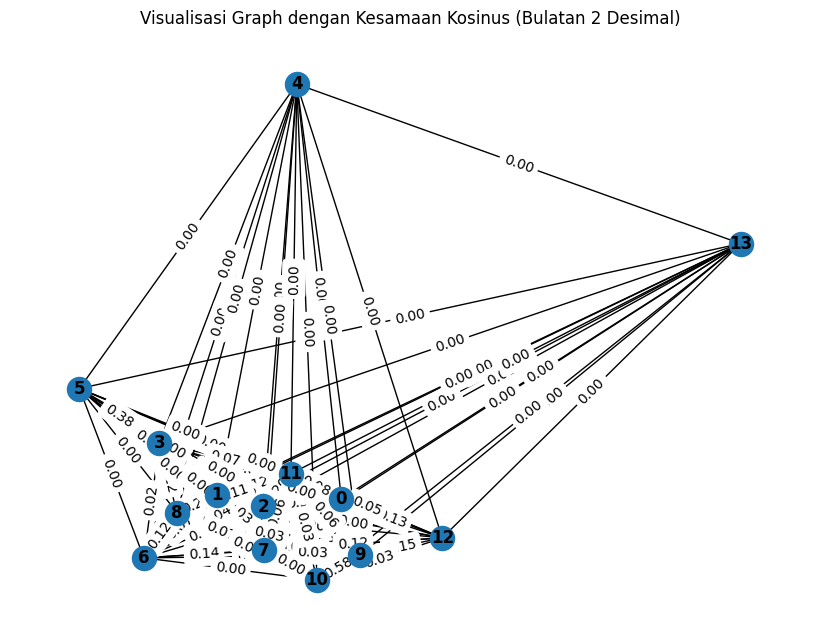

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge
plt.title("Visualisasi Graph dengan Kesamaan Kosinus (Bulatan 2 Desimal)")
plt.show()

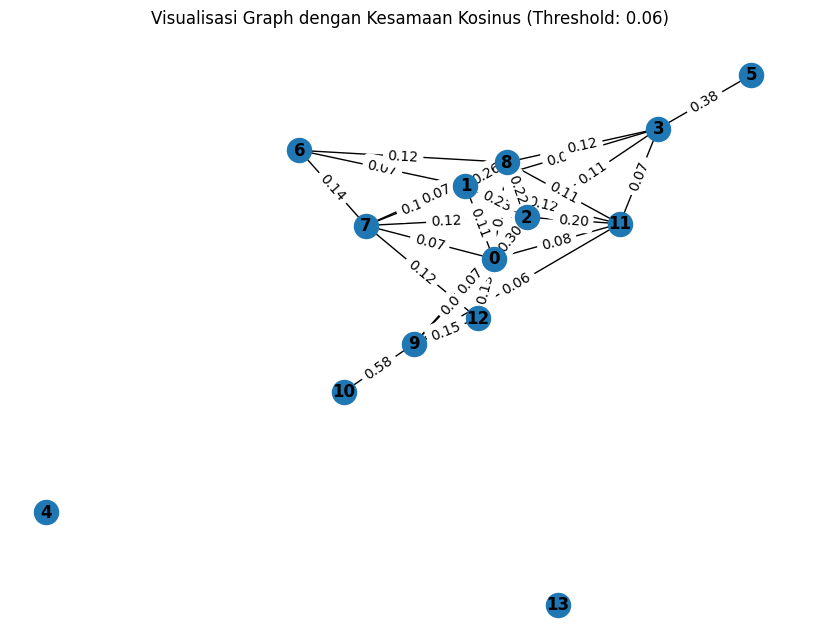

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
G.add_nodes_from(range(len(similarity_matrix)))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    # isolated_nodes_labels = {node: f'Node {node} (Not connected)' for node in isolated_nodes}
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()

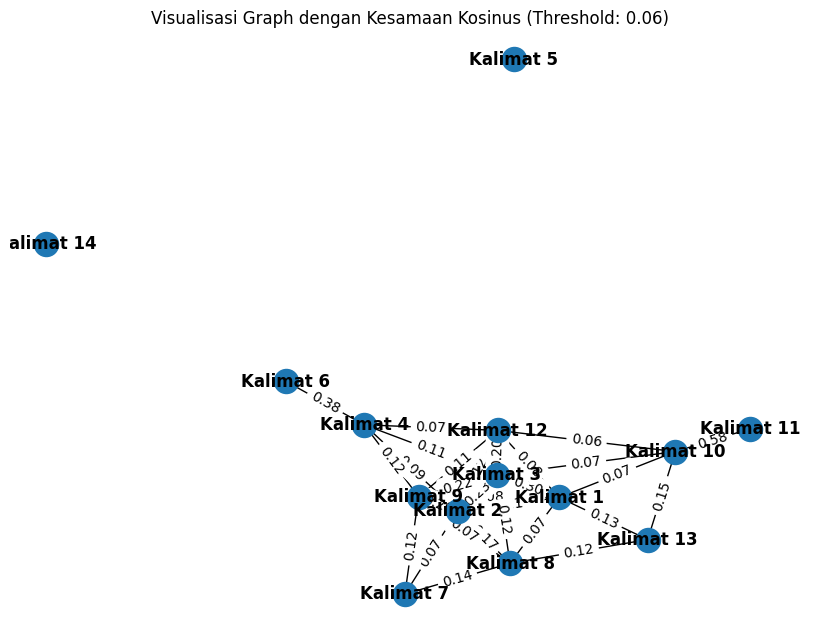

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}" for i in range(num_nodes)}

nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()

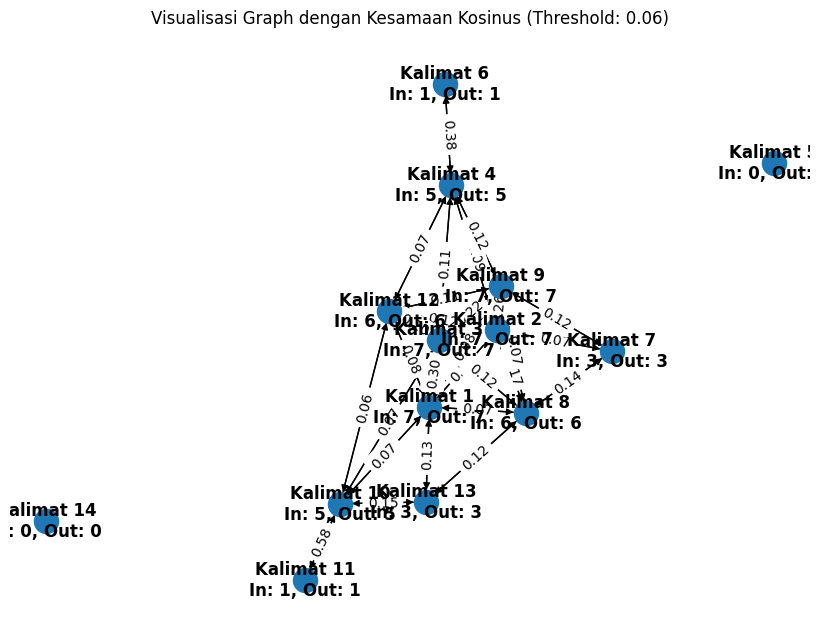

In [ ]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.DiGraph()  # Menggunakan Directed Graph agar dapat mengakses in_degree dan out_degree
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
num_nodes = len(similarity_matrix)
G.add_nodes_from(range(num_nodes))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Hitung indegree dan outdegree untuk setiap node
indegree = dict(G.in_degree())
outdegree = dict(G.out_degree())

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik

# Buat mapping untuk label node
node_labels = {i: f"Kalimat {i + 1}\nIn: {indegree[i]}, Out: {outdegree[i]}" for i in range(num_nodes)}

nx.draw(G, pos, with_labels=True, labels=node_labels, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()

In [ ]:
# Menghitung closeness centrality dari graph
closeness = nx.closeness_centrality(G)

# Menampilkan closeness centrality
print("Closeness Centrality:")
for node, closeness_value in closeness.items():
    print(f"Node {node}: {closeness_value}")

# Menampilkan kalimat dengan Closeness Centrality tertinggi
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 sentences based on Closeness Centrality:")
num_sentences_to_display = min(4, len(sorted_closeness))
for i in range(num_sentences_to_display):
    if i < len(sentence):
        print(sentence[sorted_closeness[i][0]])
    else:
        print(f"Node {sorted_closeness[i][0]} tidak ditemukan dalam kalimat.")

print("=============================")
print("Top 3 node based on Closeness Centrality:")
num_nodes_to_display = min(3, len(sorted_closeness))
for i in range(num_nodes_to_display):
    print(f"Node {sorted_closeness[i][0]} dengan Closeness Centrality {sorted_closeness[i][1]:.4f}")


Closeness Centrality:
Node 0: 0.5817307692307693
Node 1: 0.5817307692307693
Node 2: 0.6205128205128204
Node 3: 0.4898785425101215
Node 4: 0.0
Node 5: 0.3209549071618037
Node 6: 0.40468227424749165
Node 7: 0.5170940170940171
Node 8: 0.5817307692307693
Node 9: 0.4898785425101215
Node 10: 0.3209549071618037
Node 11: 0.5817307692307693
Node 12: 0.4230769230769231
Node 13: 0.0
Top 4 sentences based on Closeness Centrality:
antara
kliwantoro
copyright
Node 8 tidak ditemukan dalam kalimat.
Top 3 node based on Closeness Centrality:
Node 2 dengan Closeness Centrality 0.6205
Node 0 dengan Closeness Centrality 0.5817
Node 1 dengan Closeness Centrality 0.5817


In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Menampilkan PageRank
print("PageRank:")
for node, rank in pagerank.items():
    print(f"Kalimat {node + 1}: {rank}")

# Menampilkan kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 4 kalimat based on PageRank:")
num_sentences_to_display = min(4, len(sorted_pagerank))
for i in range(num_sentences_to_display):
    if i < len(sentence):
        print(sentence[sorted_closeness[i][0]])
    else:
        print(f"Node {sorted_closeness[i][0]} tidak ditemukan dalam kalimat.")

print("=============================")
print("Top 3 kalimat based on PageRank:")
num_nodes_to_display = min(3, len(sorted_pagerank))
for i in range(num_nodes_to_display):
    print(f"Kalimat {sorted_pagerank[i][0] + 1} dengan PageRank {sorted_pagerank[i][1]:.4f}")


PageRank:
Kalimat 1: 0.08930174353993188
Kalimat 2: 0.10920680225550966
Kalimat 3: 0.1267218647605153
Kalimat 4: 0.08891341328234441
Kalimat 5: 0.012195121951219514
Kalimat 6: 0.04949240053094441
Kalimat 7: 0.042605281710168585
Kalimat 8: 0.07815193990892233
Kalimat 9: 0.10322187378234166
Kalimat 10: 0.10239107636484979
Kalimat 11: 0.0664705806593151
Kalimat 12: 0.06960067052104862
Kalimat 13: 0.04953210878166959
Kalimat 14: 0.012195121951219514
Top 4 kalimat based on PageRank:
antara
kliwantoro
copyright
Node 8 tidak ditemukan dalam kalimat.
Top 3 kalimat based on PageRank:
Kalimat 3 dengan PageRank 0.1267
Kalimat 2 dengan PageRank 0.1092
Kalimat 9 dengan PageRank 0.1032


In [ ]:
import networkx as nx

# Buat graf
G = nx.Graph()
G.add_edges_from(edge_labels)

# Inisialisasi PageRank
pagerank = {node: 1 / len(G.nodes) for node in G.nodes}

# Iterasi untuk menghitung PageRank
num_iterations = 10

for iteration in range(num_iterations):
    print(f"Iterasi {iteration + 1}:")
    new_pagerank = {}
    damping_factor = 0.85

    for node in G.nodes:
        rank_sum = 0
        for neighbor in G.neighbors(node):
            neighbor_outdegree = len(list(G.neighbors(neighbor)))
            rank_sum += pagerank[neighbor] / neighbor_outdegree

        # Hitung PageRank baru menggunakan rumus
        new_pagerank[node] = (1 - damping_factor) / len(G.nodes) + damping_factor * rank_sum

        # Cetak langkah-langkah perhitungan PageRank untuk setiap node
        print(f"  - Kalimat {node + 1}: ({(1 - damping_factor)}/{len(G.nodes)}) + ({damping_factor} * {rank_sum}) = {new_pagerank[node]}")

    # Perbarui nilai PageRank
    pagerank = new_pagerank
    print("\n")

# Menampilkan hasil PageRank akhir
print("Hasil Akhir PageRank:")
for node, rank in pagerank.items():
    print(f"Kalimat {node + 1}: {rank}")

Iterasi 1:
  - Kalimat 1: (0.15000000000000002/12) + (0.85 * 0.10793650793650793) = 0.10424603174603174
  - Kalimat 2: (0.15000000000000002/12) + (0.85 * 0.10793650793650791) = 0.10424603174603173
  - Kalimat 3: (0.15000000000000002/12) + (0.85 * 0.09682539682539681) = 0.09480158730158729
  - Kalimat 8: (0.15000000000000002/12) + (0.85 * 0.10317460317460317) = 0.10019841269841269
  - Kalimat 9: (0.15000000000000002/12) + (0.85 * 0.10793650793650794) = 0.10424603174603174
  - Kalimat 10: (0.15000000000000002/12) + (0.85 * 0.14880952380952378) = 0.13898809523809522
  - Kalimat 12: (0.15000000000000002/12) + (0.85 * 0.08095238095238094) = 0.08130952380952379
  - Kalimat 13: (0.15000000000000002/12) + (0.85 * 0.04246031746031746) = 0.048591269841269845
  - Kalimat 4: (0.15000000000000002/12) + (0.85 * 0.13293650793650794) = 0.12549603174603174
  - Kalimat 7: (0.15000000000000002/12) + (0.85 * 0.037698412698412696) = 0.044543650793650795
  - Kalimat 6: (0.15000000000000002/12) + (0.85 * 0.0

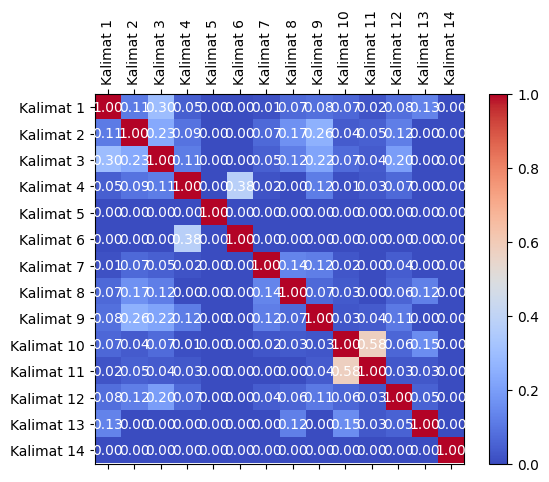

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
				jakarta antara  jaksa penuntut umum jpu pada kejaksaan agung kejagung ri menuntut account director of integrated account departement pt huawei tech investment mukti ali selama  tahun dan membayar denda rp juta subsider  bulan pidana kurungan dalam perkara korupsi bts g kementerian komunikasi dan informatika kemenkominfo.: 10.7806
Closeness Centrality of menjatuhkan pidana terhadap terdakwa mukti ali selama  tahun dikurangi sepenuhnya dengan lamanya terdakwa ditahan dengan perintah agar terdakwa tetap dilakukan penahanan di rutan kata jaksa dalam persidangan di pengadilan tindak pidana korupsi tipikor pada pengadilan negeri jakarta pusat senin.: 8.8419
Closeness Centrality of jaksa menyatakan bahwa terdakwa mukti ali terbukti secara sah dan meyakinkan bersalah menurut hukum turut serta dalam melakukan tindak pidana korupsi bts g kementerian komunikasi dan informatika kemenkominfo.: 8.3432
Closeness Centrality of mukti didakwa telah melanggar pasal  ayat  jun

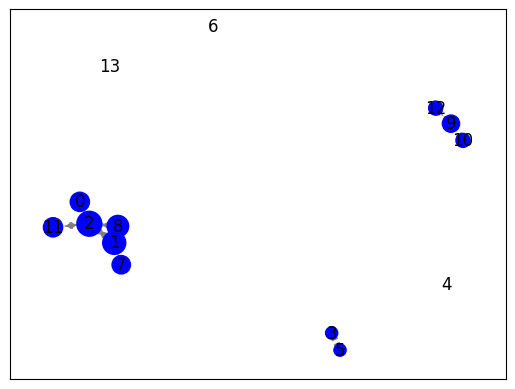

In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.15 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
# Cetak closeness centrality
print("Closeness Centrality:")
# for node, closeness in closeness_centrality.items():
#     print(f"Node {node}: {closeness:.4f}")
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, closeness in sorted_closeness.items():
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 2: 0.3205
Node 1: 0.2747
Node 8: 0.2404
Node 0: 0.1923
Node 11: 0.1923
Node 7: 0.1748
Node 9: 0.1538
Node 10: 0.1026
Node 12: 0.1026
Node 3: 0.0769
Node 5: 0.0769
Node 4: 0.0000
Node 6: 0.0000
Node 13: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_closeness = list(sorted_closeness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datacl = {
    "Node": [node for node, _ in top_3_closeness],
    "Closeness Centrality": [closeness for _, closeness in top_3_closeness],
    "Kalimat": [sentences[node] for node, _ in top_3_closeness]
}

df_top_3 = pd.DataFrame(datacl)

# Cetak DataFrame
print("Tiga Node Closeness Teratas")
df_top_3

Tiga Node Closeness Teratas


,Node,Closeness Centrality,Kalimat
0,2,0.320513,jaksa menyatakan bahwa terdakwa mukti ali terb...
1,1,0.274725,menjatuhkan pidana terhadap terdakwa mukti ali...
2,8,0.240385,adapun halhal yang meringankan mukti ali adala...


In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Cetak PageRank dalam urutan dari terbesar ke terkecil
print("PageRank :")
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
for node, rank in sorted_pagerank.items():
    print(f"Node {node}: {rank:.4f}")

PageRank :
Node 2: 0.1674
Node 9: 0.1275
Node 1: 0.1260
Node 3: 0.0873
Node 5: 0.0873
Node 8: 0.0844
Node 10: 0.0673
Node 12: 0.0673
Node 7: 0.0488
Node 0: 0.0487
Node 11: 0.0487
Node 4: 0.0131
Node 6: 0.0131
Node 13: 0.0131


In [ ]:
# Cetak closeness centrality
top_3_pagerank = list(sorted_pagerank.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datapg = {
    "Node": [node for node, _ in top_3_pagerank],
    "Pagerank": [rank for _, rank in top_3_pagerank],
    "Kalimat": [sentences[node] for node, _ in top_3_pagerank]
}

df_top_3pg = pd.DataFrame(datapg)

# Cetak DataFrame
print("Tiga Node Pagerank Teratas")
df_top_3pg

Tiga Node Pagerank Teratas


,Node,Pagerank,Kalimat
0,2,0.167429,jaksa menyatakan bahwa terdakwa mukti ali terb...
1,9,0.127461,baca juga irwan hermawan dituntut tahun penja...
2,1,0.126032,menjatuhkan pidana terhadap terdakwa mukti ali...


In [ ]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 2: 0.0897
Node 1: 0.0513
Node 9: 0.0128
Node 0: 0.0000
Node 3: 0.0000
Node 4: 0.0000
Node 5: 0.0000
Node 6: 0.0000
Node 7: 0.0000
Node 8: 0.0000
Node 10: 0.0000
Node 11: 0.0000
Node 12: 0.0000
Node 13: 0.0000


In [ ]:
# Cetak closeness centrality
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,2,0.089744,jaksa menyatakan bahwa terdakwa mukti ali terb...
1,1,0.051282,menjatuhkan pidana terhadap terdakwa mukti ali...
2,9,0.012821,baca juga irwan hermawan dituntut tahun penja...
